## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

## Loading Data 

In [2]:
train_data = pd.read_csv('Churn_Modelling.csv')
train_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Analysing the data 

In [3]:
train_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

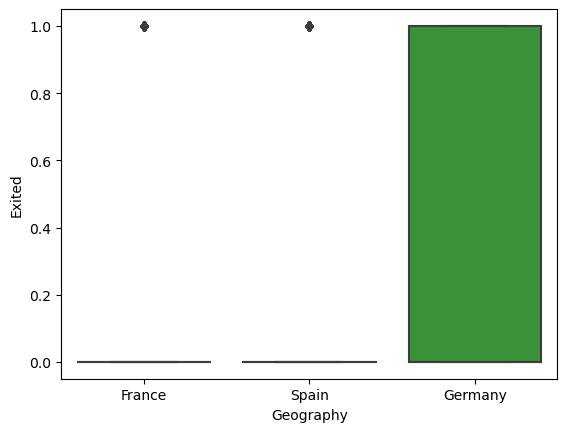

In [5]:
sns.boxplot(x = 'Geography', y = 'Exited', data = train_data)

<AxesSubplot:xlabel='Geography', ylabel='count'>

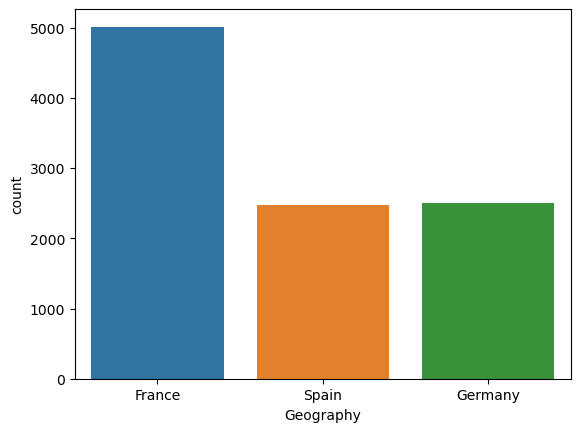

In [6]:
sns.countplot(x = 'Geography',data = train_data)

In [7]:
train_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

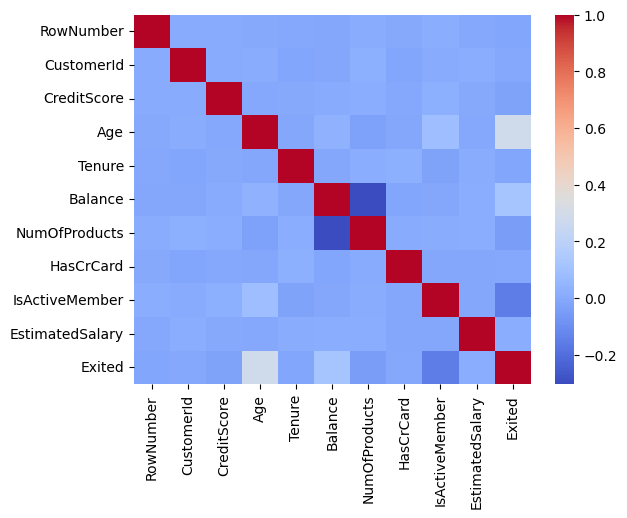

In [8]:
corr_mat = train_data.corr()
sns.heatmap(corr_mat, cmap = 'coolwarm')

## Preprocessing the data 

In [9]:
train_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data = train_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
geography = pd.get_dummies(data['Geography'])
gender = pd.get_dummies(data['Gender'])
data= pd.concat([data, geography, gender], axis = 1)

In [12]:
data = data.drop(columns = ['Geography', 'Gender'], axis = 1)
data = data.drop(columns = ['Male'], axis = 1)

<AxesSubplot:>

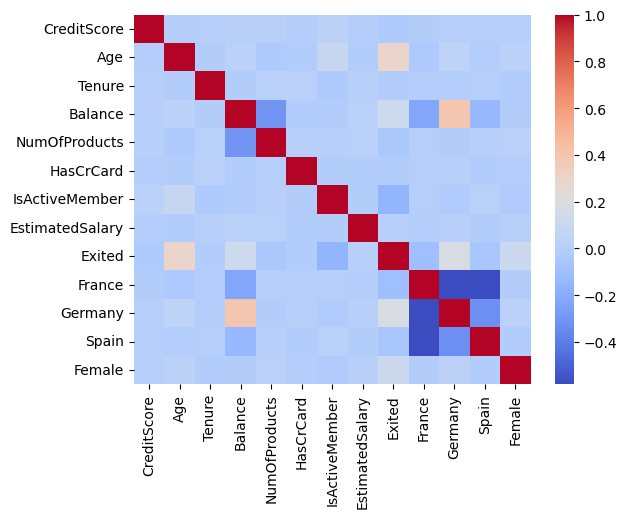

In [13]:
corr_mat = data.corr()
sns.heatmap(corr_mat, cmap = 'coolwarm')

In [14]:
data = data.drop(columns = ['Spain'], axis = 1)

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Train Test Split

In [16]:
x = data.drop(columns = 'Exited', axis = 1)
y = data['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [17]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

## Model Selection

### Random Forest Classifier

In [19]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.86

### Logistic Regression 

In [20]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test,y_test)

0.8125

### XGBoost

In [21]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.865

## Hyperperamter Tuning 

base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##  Manual Tuning

In [93]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate = 0.3,
    max_depth = 4,
    min_child_weight = 5,
    subsample = 1,
    colsample_bytree = 0.6,
    gamma = 0.5
    )


In [94]:
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.869